<a href="https://colab.research.google.com/github/micheleguidaa/hands-on-ml/blob/main/basic/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict student performance in secondary education (high school).**

# Importing the dataset

Install ucimlrepo for dataset

In [ ]:
!pip install ucimlrepo

In [146]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.concat([X,y],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


The target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful [Student Performance UC Irvine](https://archive.ics.uci.edu/dataset/320/student+performance). So, the goal for this notebook is to try to predict G3 without G1, G2.





In [13]:
y = y.drop(columns=['G1','G2'])

# Exploratory Data Analysis

The dataset has **no Missing Values**

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Visualization about distributions of features and target

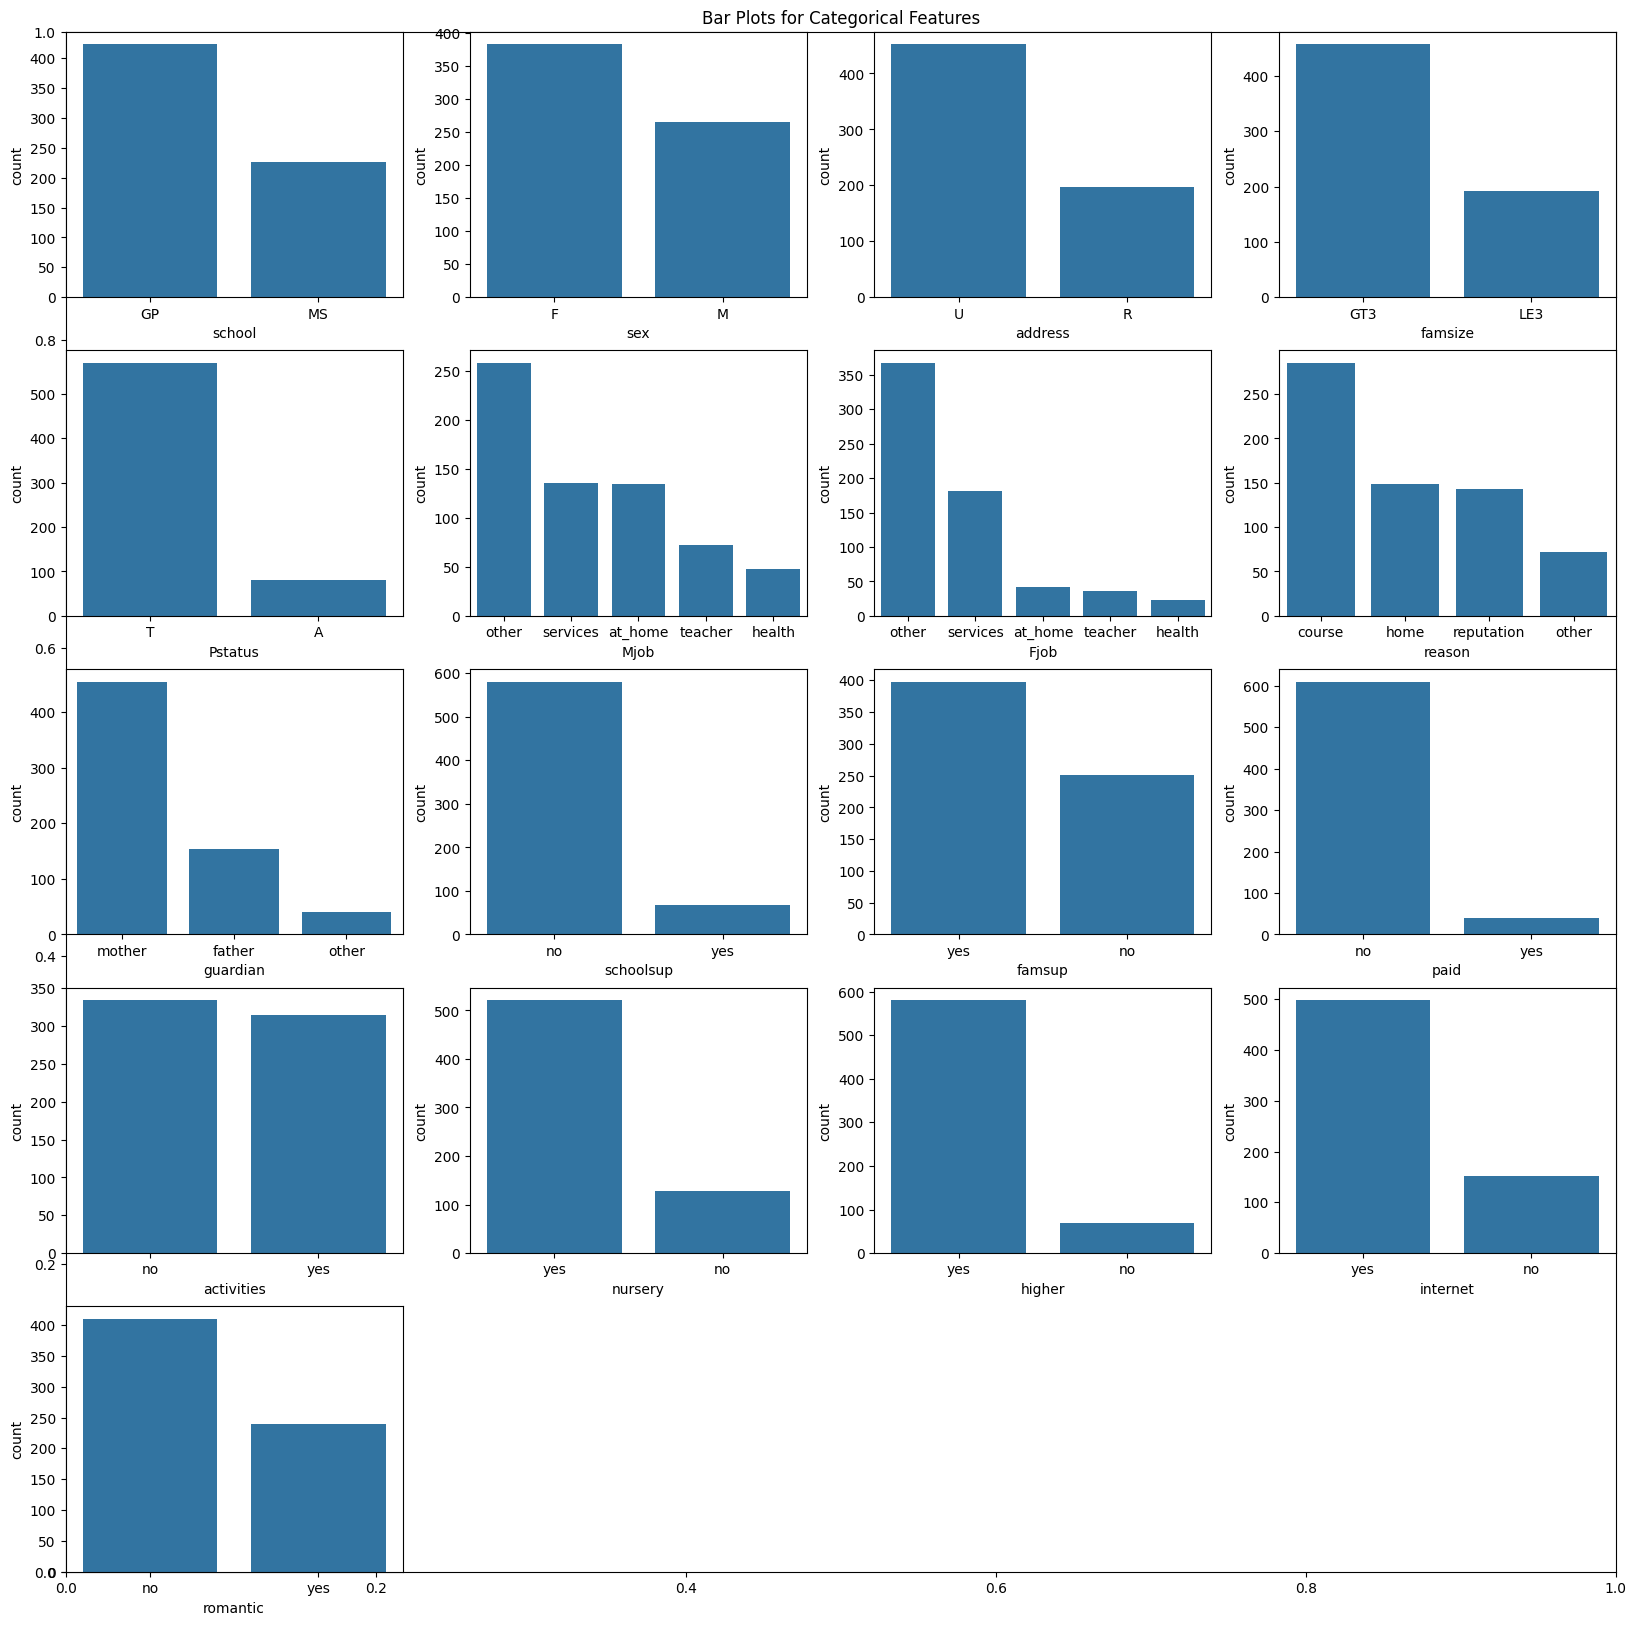

In [41]:
plt.figure(figsize=(20,20))
plt.title("Bar Plots for Categorical Features")
n_object_features = X.select_dtypes('object').shape[1]
for i, column in enumerate(X.select_dtypes('object')):
  plt.subplot((n_object_features//4)+1,4,i+1)
  sns.barplot(X[column].value_counts())

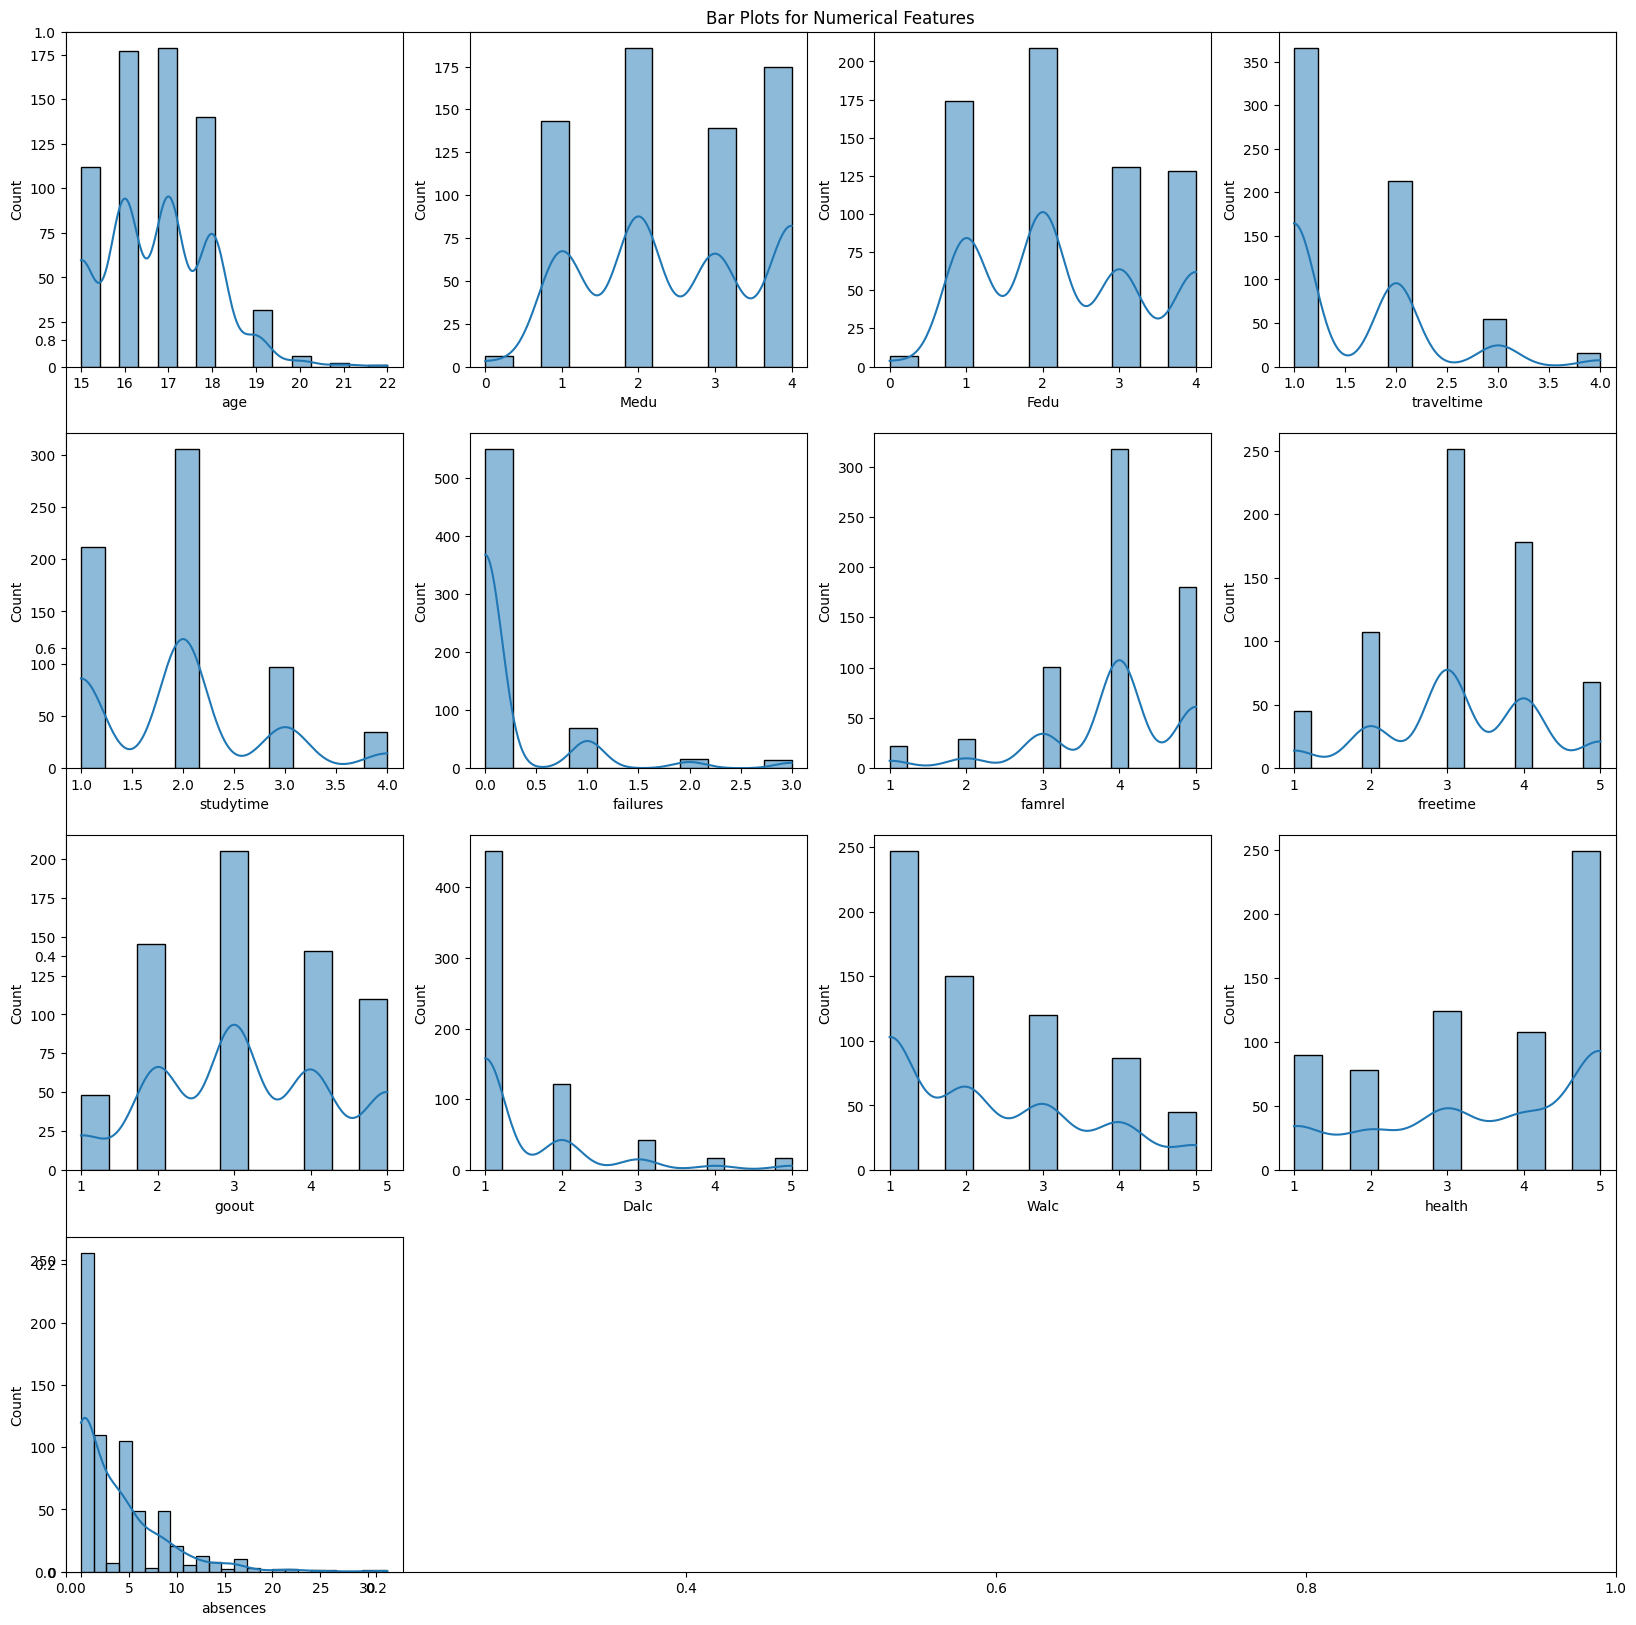

In [50]:
plt.figure(figsize=(20,20))
plt.title("Bar Plots for Numerical Features")
n_object_features = X.select_dtypes(['int64']).shape[1]
for i, column in enumerate(X.select_dtypes('int64')):
  plt.subplot((n_object_features//4)+1,4,i+1)
  sns.histplot(X[column],kde=True)

## Preprocessing

In [73]:
X_proc = pd.get_dummies(X,columns=X.select_dtypes('object').columns,dtype='int64')
X_proc

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [152]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

X_proc2 = pd.concat([X_proc,y.iloc[:,:2]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_proc,student_performance.data.targets['G3'] ,random_state=42)

models = {
    'DummyRegressor': DummyRegressor(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGB': XGBRegressor()
}

# Dizionario per salvare i risultati
all_preds = {}

for name_model, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    all_preds[name_model] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    r_mse = root_mean_squared_error(y_test, y_pred)
    print(f"{name_model} has mse: {mse} and rmse: {r_mse}")

# Creazione DataFrame con tutte le predizioni + y_test
df_results = pd.DataFrame({'y_test': y_test})
for name_model, preds in all_preds.items():
    df_results[f'{name_model}'] = preds

df_results.head()

DummyRegressor has mse: 10.271442938052799 and rmse: 3.204909193417623
Lasso has mse: 1.1869417999333098 and rmse: 1.0894685860240807
KNN has mse: 1.8728834355828219 and rmse: 1.368533315481513
RandomForest has mse: 1.4219018404907975 and rmse: 1.192435256309875
SVR has mse: 1.587246388657127 and rmse: 1.2598596702240799
XGB has mse: 1.6277308464050293 and rmse: 1.2758255004882812


,y_test,DummyRegressor,Lasso,KNN,RandomForest,SVR,XGB
636,19,11.796296,17.802306,16.8,17.38,17.539975,16.987179
220,12,11.796296,11.388523,11.8,11.16,11.598326,11.302743
594,18,11.796296,17.886346,17.2,17.19,17.521624,17.048374
429,11,11.796296,11.304483,11.6,11.10,11.324306,10.613195
72,11,11.796296,11.556602,12.2,11.39,11.926646,10.930540


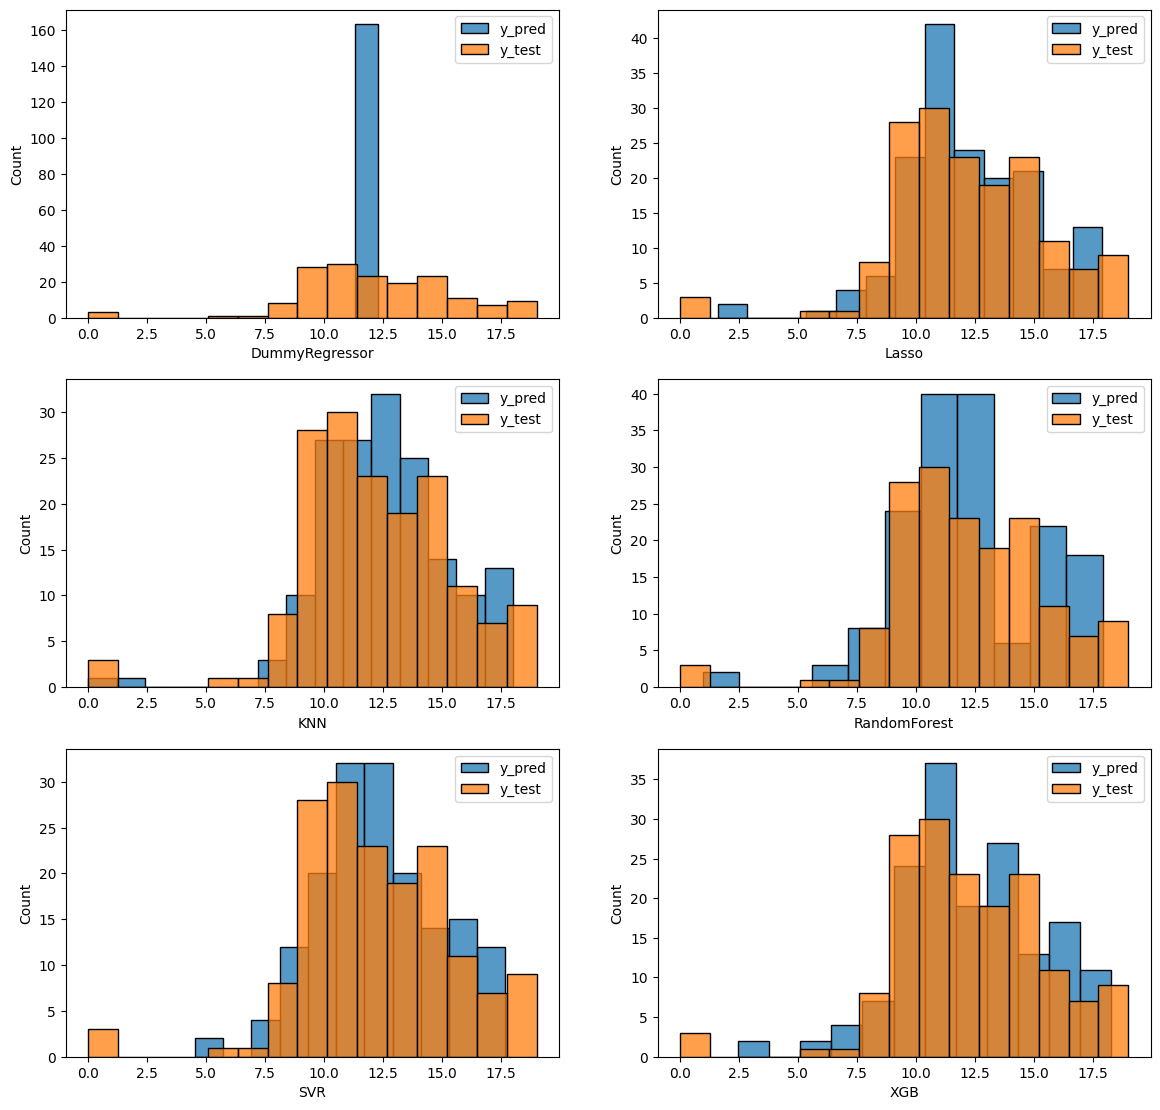

In [166]:
plt.figure(figsize=(14,28))
for i,model in enumerate(models.keys(),start=1):
  plt.subplot(len(models),2,i)
  sns.histplot(df_results[model])
  sns.histplot(y_test)
  plt.legend(['y_pred','y_test'])